In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
import scipy.stats
import plotly.graph_objects as go
import plotly

# draw subgraph(a)

## loaddata

In [32]:
result = pd.read_csv('../data/fig5/figure5a.csv')  
#56:A_Behavior_model_vfinal/analysis/related_es_avg.ipynb

## draw 

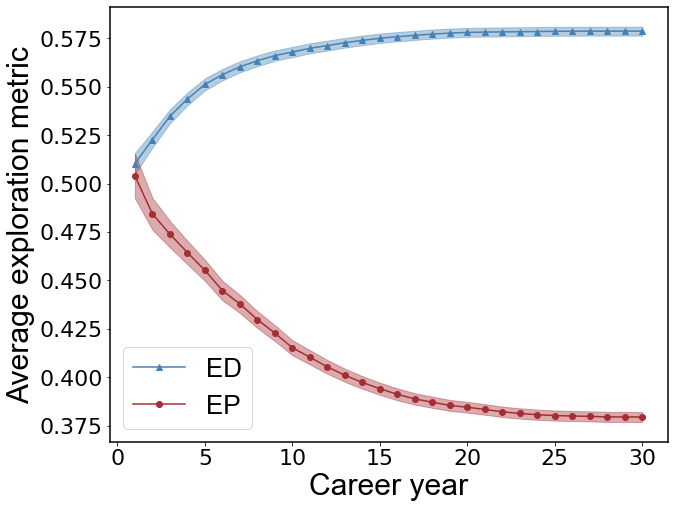

In [33]:
plt_x = []
plt_y = []
confi = []
plt_x_1 = []
plt_y_1 = []
confi_1 = []
count=[] 
CareerYear_list = list(result.CareerYear.unique())
CareerYear_list.sort()

for cyear in CareerYear_list:
    plt_x.append(cyear)
    group= result[result.CareerYear<=cyear].groupby(['aid']).mean().reset_index()
    plt_y.append(group['EP'].mean())
    confi.append(scipy.stats.sem(group['EP']))
    plt_x_1.append(cyear)
    plt_y_1.append(group['ED'].mean())
    confi_1.append(scipy.stats.sem(group['ED']))
    count.append(group.shape[0])
plt_y = np.array(plt_y)
confi = np.array(confi)
plt_y_1 = np.array(plt_y_1)
confi_1 = np.array(confi_1)

fig, ax = plt.subplots(figsize = (10, 8))
fontsize=30
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}

ax.plot(plt_x_1, plt_y_1,'^-',color='steelblue', label='ED')
ax.fill_between(plt_x_1, plt_y_1 - 1.96*confi_1, plt_y_1 + 1.96*confi_1, color="steelblue",alpha=0.4)

color = (165/255,45/255, 52/255)
ax.plot(plt_x, plt_y,'o-',color=color, label='EP' )
ax.fill_between(plt_x, plt_y - 1.96*confi, plt_y + 1.96*confi, color=color,alpha=0.4)

ax.grid(False)


plt.xticks(fontsize=fontsize-8)
plt.yticks(fontsize=fontsize-8)
plt.ylabel('Average exploration metric',fontdict=font_conf)
plt.xlabel('Career year',fontdict=font_conf)
plt.legend(prop={'family' : 'Arial', 'weight' : 'normal', 'size': fontsize-4})

bwith = 1.5
ax = plt.gca()#获取边框
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.savefig('./draw/figure_5a.png', bbox_inches = 'tight')

# draw subgraph(b)

## loaddata

In [23]:
result = pd.read_csv('../data/fig5/figure5b.csv')  
#56:A_Behavior_model_vfinal/analysis/related_es_avg.ipynb

## draw 

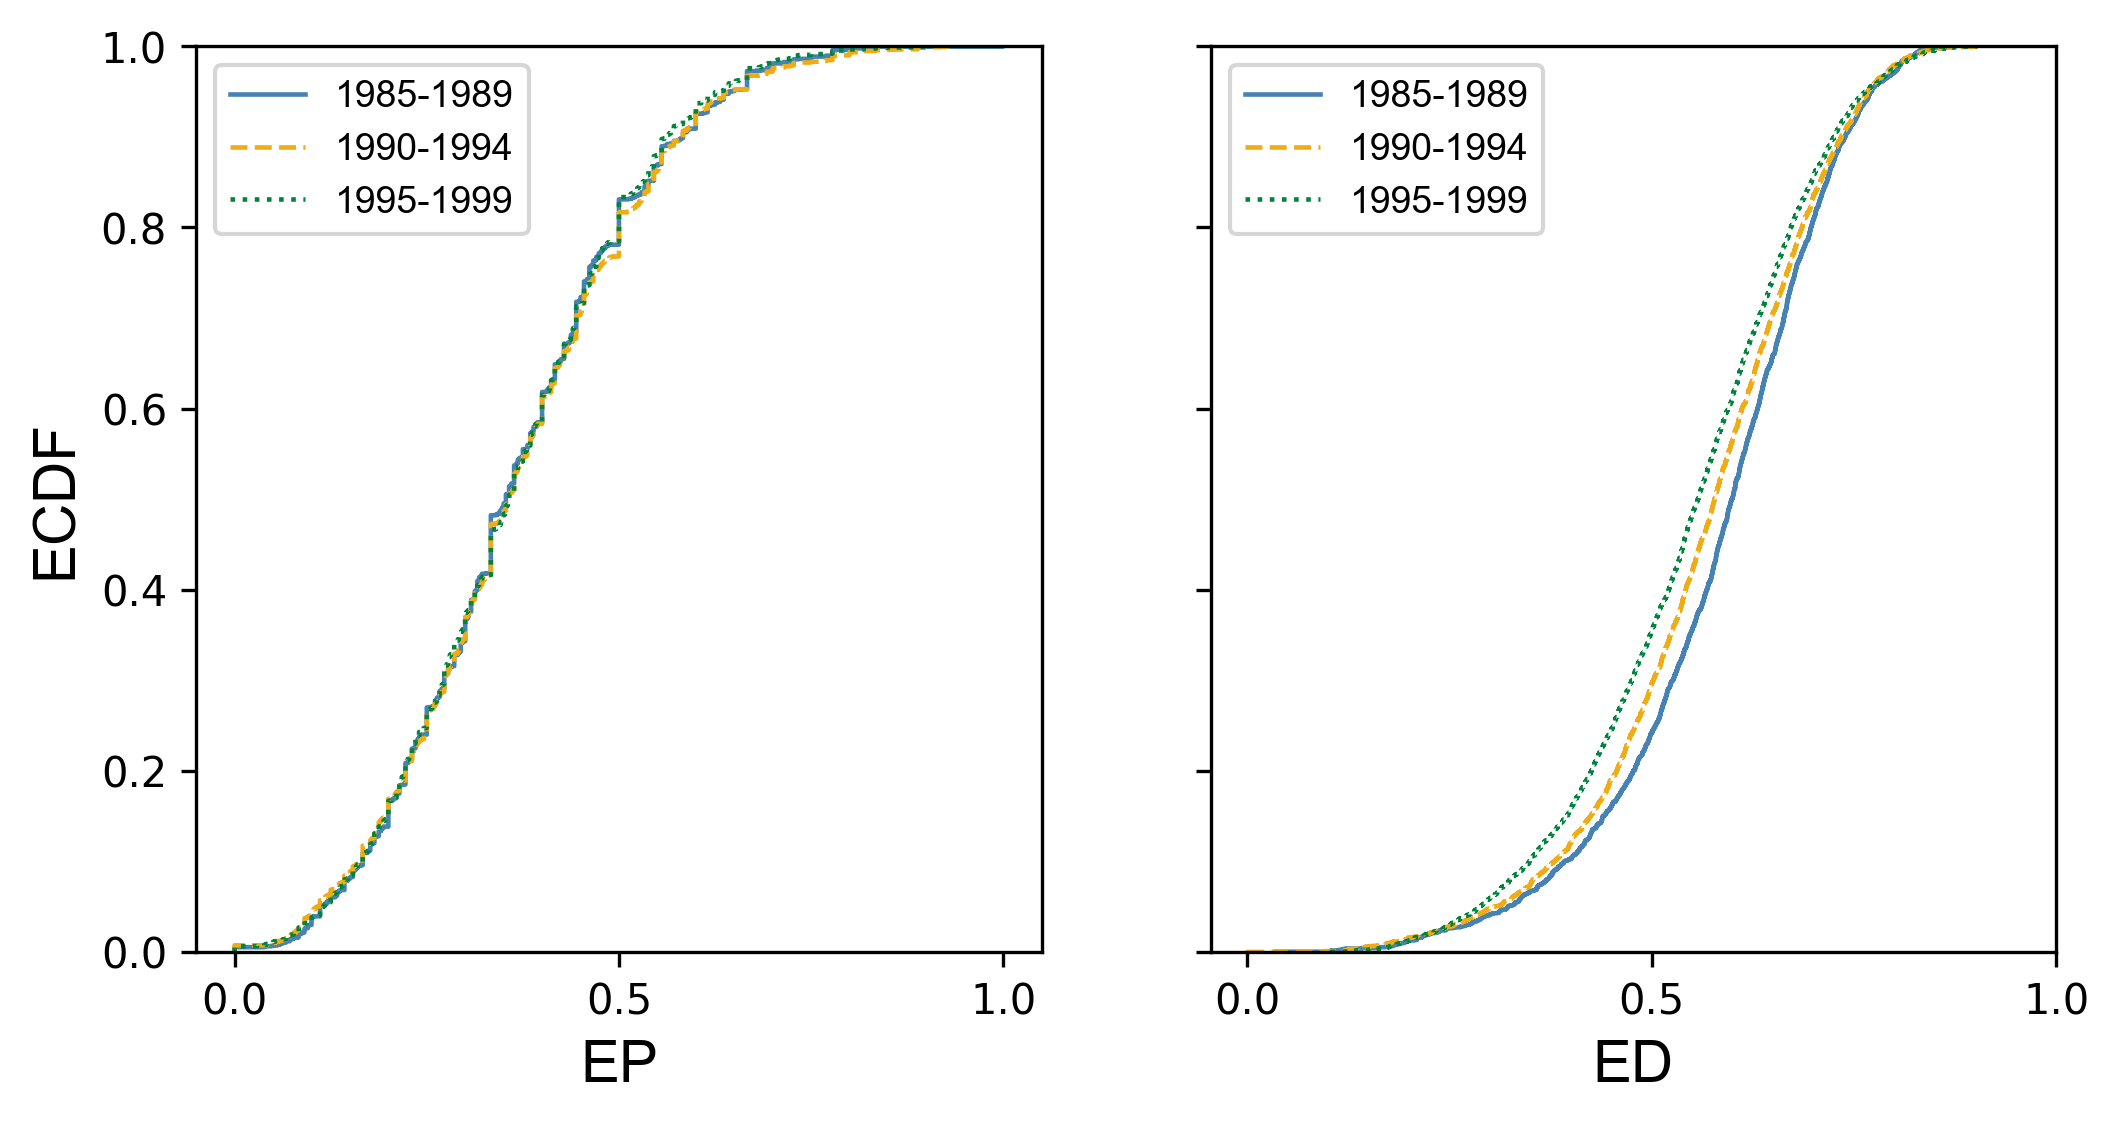

In [26]:
yearrange = [ (1985,1990),(1990,1995),(1995,2000)]
#years
df={}
for time in yearrange:
    df[time] = result.loc[result['startyear']<time[1]].loc[result['startyear']>=time[0]].groupby(['aid']).mean().reset_index()

fig,ax = plt.subplots(1,2,figsize=(8,4),dpi=300,sharey=True)

colors = ['steelblue' ,(0.9411764705882353, 0.6745098039215687, 0.08235294117647059, 1.0),(0.0, 0.5137254901960784, 0.23921568627450981, 1.0) ]
markers = ['-' ,'--',':' ]
for time in yearrange:
    axesSub = sns.ecdfplot( df[time]["EP"],ax=ax[0],label=str(time[0])+'-'+str(time[1]-1),linewidth=1.1 ,color=colors[0],linestyle=markers[0]) 
    axesSub = sns.ecdfplot( df[time]["ED"],ax=ax[1],label=str(time[0])+'-'+str(time[1]-1),linewidth=1.1 ,color=colors[0],linestyle=markers[0])
    colors.pop(0)
    markers.pop(0)

fontsize=14
font_conf = {'family' : 'Arial', 'weight' : 'normal', 'size': fontsize}
ax[0].set_xticks([0,0.5,1],fontsize=fontsize-4, direction='out')
ax[0].grid(False)
ax[0].set_xlabel( "EP",fontdict=font_conf)
ax[0].set_ylabel( "ECDF",fontdict=font_conf)
ax[0].legend(prop={'family' : 'Arial', 'weight' : 'normal', 'size': fontsize-5},loc=2)

#ax[0].tick_params(bottom=False,top=False,left=False,right=False)
ax[1].set_xticks([0,0.5,1],fontsize=fontsize-4, direction='out')
ax[1].grid(False)
ax[1].set_xlabel( "ED",fontdict=font_conf)
ax[1].legend(prop={'family' : 'Arial', 'weight' : 'normal', 'size': fontsize-5},loc=2)
#ax[1].tick_params(bottom=False,top=False,left=False,right=False)

plt.savefig('./draw/figure_5b.png',)

# draw subgraph(c)

In [3]:
result = pd.read_csv('../data/fig5/figure5c.csv')  
#Behavior_2022_5/experiment/quantifying_pastes_future/psm/twang_final/year/draw/流动5.ipynb
indexlist=range(2000,2010,3)

In [4]:
def get_color(i):
    if(i.find('B')>=0): #,,
        return "rgba(35,127,54, 0.98)" 
    if(i.find('C')>=0): # 		
        return "rgba(162,41,50, 0.98)"
    if(i.find('D')>=0):
        return "rgba(24, 92, 143, 0.98)"
    return "rgba(238, 172, 25, 0.98)"
def get_y_index(label):
    #print(label)
    if(label.find('A') >= 0):
        return 0.004
    if(label.find('B') >= 0):
        return 0.245
    if(label.find('C') >= 0):
        return 0.595
    if(label.find('D') >= 0):
        return 0.835
def get_x_index(label):
    #print(label)
    for i in range(len(list(indexlist))):
        #print(indexlist[i])
        if(label == str(indexlist[i])):
            return i * ( 1/len(list(indexlist)) ) + 0.005

In [5]:
#get info
nodes = {}
pre=str(indexlist[0])
for now in indexlist[1:]:
    now=''+str(int(now))+''

    t = (result.groupby([pre])[now].value_counts(normalize=False))
    t = t.sort_index()
    #print(result.groupby([pre])[now].value_counts(normalize=True))
    for k in t.index:
        if(t[k]==0):
            continue
        nodes[(f'Group {k[0]} in {int(pre)} year')] = {'color': get_color( k[0]  ),'year':pre}  #{int(pre)-gap+1}-
        nodes[(f'Group {k[1]} in {int(now)} year')] = {'color': get_color( k[1]  ),'year':now}  #{int(now)-gap+1}-
    pre=now
    
nodes_keys=list(set(nodes.keys()))
nodes_keys.sort()
dict_ = dict(zip(nodes_keys,range(0,len(nodes_keys))))

links = {}
pre=str(indexlist[0])
for now in indexlist[1:]:
    now=''+str(int(now))+''

    t = (result.groupby([pre])[now].value_counts(normalize=False))
    t = t.sort_index()
    for k in t.index:
        if(t[k]==0):
            continue
        
        
        links[len(links)] = {'source':dict_[(f'Group {k[0]} in {int(pre)} year')] , #{int(now)-gap+1}-
                             'target':dict_[(f'Group {k[1]} in {int(now)} year')] , #{int(now)-gap+1}-
                             'value':t[k] ,
                             'color':get_color( k[0]  )}
    pre=now

In [6]:
#transform to dict 
links_dict = {'source':[],'target':[],'color':[],'value':[]}
for i in links:
    links_dict['source'].append(links[i]['source'])
    links_dict['target'].append(links[i]['target'])
    links_dict['color'].append(links[i]['color'].replace("0.98", str(.6)) )
    links_dict['value'].append(links[i]['value'])

In [7]:
nodes_dict = {'label':[],'color':[],'x':[],'y':[],'thickness':20}
count= 0 
for i in nodes_keys:
    #nodes_dict['label'].append(i)
    nodes_dict['color'].append(nodes[i]['color'] )
    nodes_dict['x'].append(get_x_index(nodes[i]['year']))
    nodes_dict['y'].append(get_y_index(i))
    count+=1

In [8]:
data = go.Sankey(link =links_dict, node=nodes_dict )# plot
fig = go.Figure(data)
fig.update_layout(title=" ",  font_size=12 ,width=1900,height=800)
plotly.offline.plot(fig, filename='./draw/figure_5c.html')

'./draw/figure_5c.html'